In [576]:
import warnings
warnings.filterwarnings("ignore")

In [578]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [579]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## EDA

### Визуализация

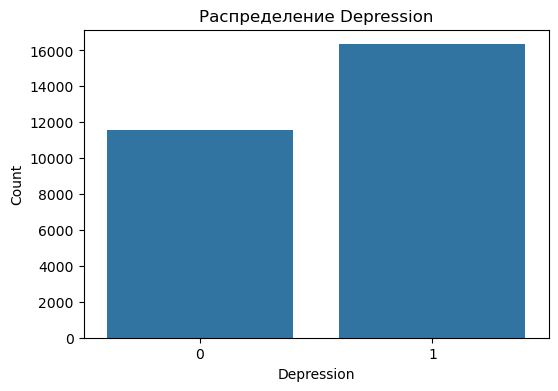

In [585]:
# Распределение целевой переменной
plt.figure(figsize=(6,4))
sns.countplot(x='Depression', data=df)
plt.title('Распределение Depression')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

Пояснение:

В наборе явное преобладание депрессии. Количество людей с признаками депрессии значительно превышает число людей без депрессии.

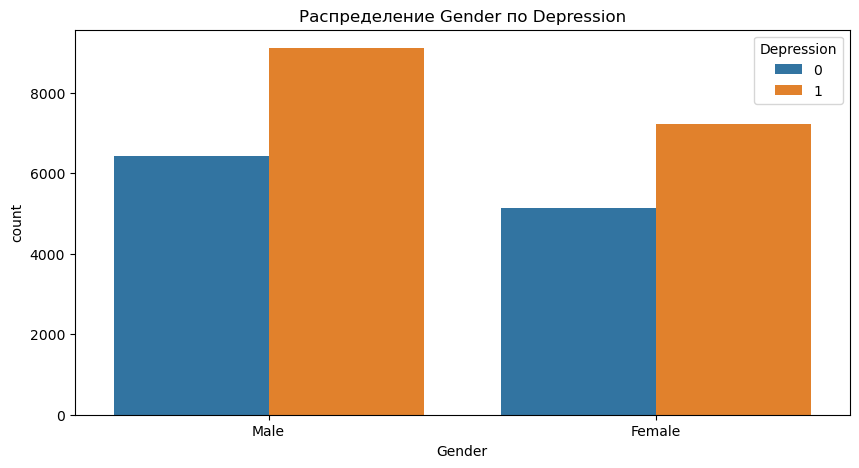

In [587]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Распределение Gender по Depression')
plt.show()

Пояснение:

Распределение по полу и депрессии показывает, что мужчины имеют несколько более высокую склонность к депрессии по сравнению с женщинами.

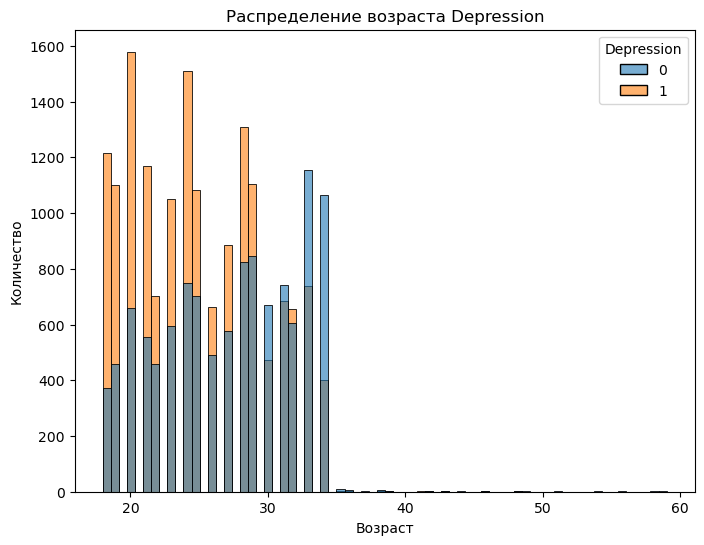

In [590]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Depression', alpha=0.6)
plt.title('Распределение возраста Depression')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Пояснение:

Также, по распределению возраста, можем заметить, что признаки депрессии заметны преимущественно у молодых людей до 30 лет. После этого возраста симптомы депрессии сильно не проявляются, что указывает на склонность депрессии к более молодой возрастной группе. 

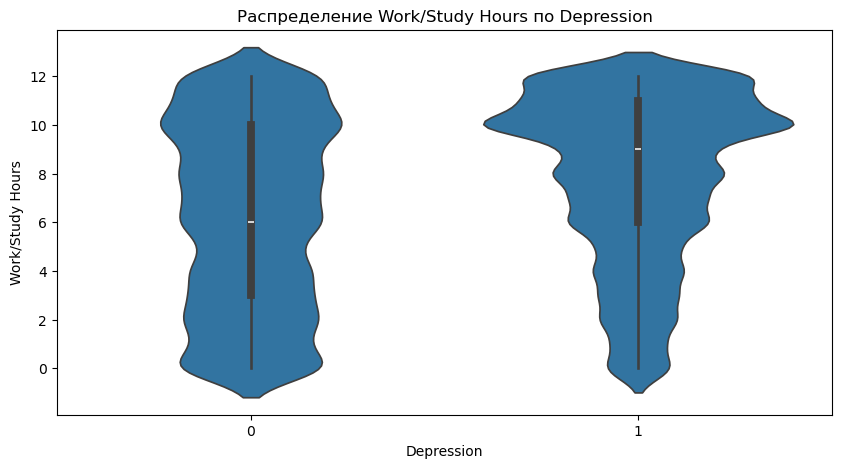

In [592]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Depression', y='Work/Study Hours', data=df)
plt.title('Распределение Work/Study Hours по Depression')
plt.xlabel('Depression')
plt.ylabel('Work/Study Hours')
plt.show()

Пояснение:

По графику можно проследить, что среднее количество часов в день, которое студент посвящает работе или учебе, оказывает влияние на уровень стресса и депрессии. Чем больше времени студент уделяет учебе, тем выше вероятность проявления признаков депрессии.

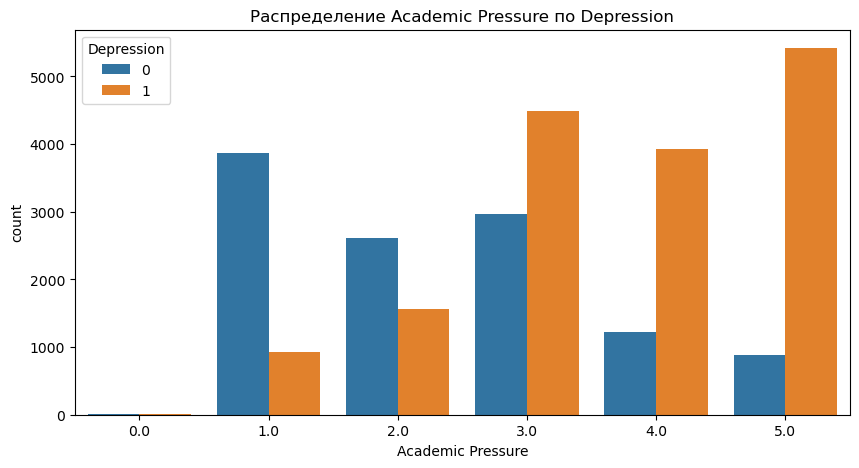

In [594]:
plt.figure(figsize=(10,5))
sns.countplot(x='Academic Pressure', hue='Depression', data=df)
plt.title('Распределение Academic Pressure по Depression')
plt.show()

Пояснение:

По графику можно увидеть показатель уровня психологического давления, которое испытывает студент в учебной среде. Также наблюдается тенденция, что с увеличением этого давления растёт уровень депрессии.

### Зависимости

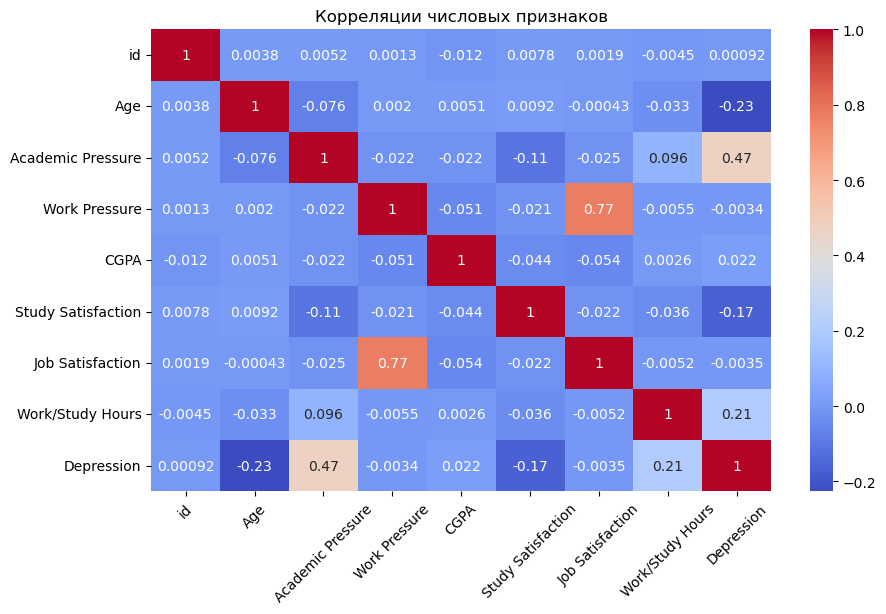

In [597]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

Корреляции с Depression:

- **Work Pressure, Job Satis, CGPA** - связи около нуля -> не влияют
- **Academic Pressure** - чем больше давления, тем больше депрессии
- **Age**: -0,23 -> слабая отрицательная связь. С увеличением возраста склонность к признакам депрессии в среднем постепенно уменьшается
- **Study Satisfaction**: -0,17 -> отрицательную связь. Выше уровень удовлетворенности учебным процессом соответствует лучшему психическому благополучию
- **Work/Study Hours**: -0,21 -> увеличение учебной нагрузки может повышать уровень стресса


H - данные x и y зависимы друг от друга.

H0 - данные независимы

H1 - данные зависимы

In [687]:
best_features = ["Age", "Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction", "Job Satisfaction", "Work/Study Hours", "Gender"]

for i in best_features:
    table = pd.crosstab(df[i], df["Depression"])

    chi2, p, dof, expected = chi2_contingency(table)
    print(f"H_0 - {p > 0.05} \t Для {i} и Depression: p-value - {p}, хи - {chi2}")

H_0 - False 	 Для Age и Depression: p-value - 0.0, хи - 1743.8887427008679
H_0 - False 	 Для Academic Pressure и Depression: p-value - 0.0, хи - 6420.471139303467
H_0 - True 	 Для Work Pressure и Depression: p-value - 0.4787580659616242, хи - 1.4731197813351786
H_0 - False 	 Для CGPA и Depression: p-value - 2.4579669363730816e-11, хи - 529.2156976828571
H_0 - False 	 Для Study Satisfaction и Depression: p-value - 1.4636084215749326e-169, хи - 794.905356820441
H_0 - True 	 Для Job Satisfaction и Depression: p-value - 0.8061353036504226, хи - 1.6147687878925818
H_0 - False 	 Для Work/Study Hours и Depression: p-value - 1.420514686442782e-268, хи - 1288.6058344713335
H_0 - True 	 Для Gender и Depression: p-value - 0.7691767219221819, хи - 0.08611404693079235


### Аномалии

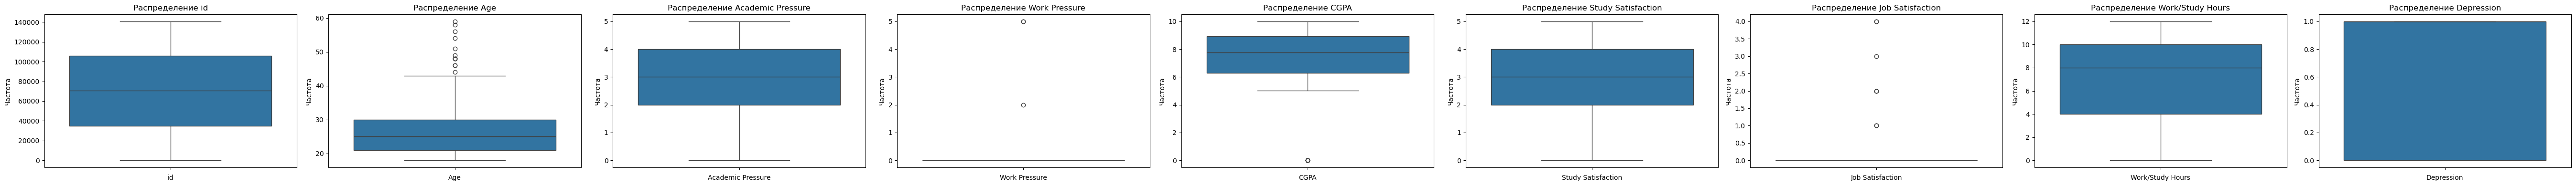

In [602]:
num_cols = df.select_dtypes(include=['float', 'int']).columns 
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
   sns.boxplot(df[col], ax=ax)
   ax.set_title(f'Распределение {col}')
   ax.set_xlabel(col)
   ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

### Duplicate

In [604]:
df.nunique() # уникальные значения

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [605]:
df.duplicated().sum() # дубликатов не выявлено

0

### Пропуски

In [608]:
df.isnull().sum().sum() # пропусков не выявлено

0

### Типы данных

In [610]:
categorial_features  = list(df.select_dtypes(include=['object']).columns)

print(categorial_features)

['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


In [611]:
df[categorial_features]

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,Yes,1.0,No
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,No,2.0,Yes
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,No,1.0,Yes
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes,5.0,Yes
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,Yes,1.0,No
...,...,...,...,...,...,...,...,...,...
27896,Female,Surat,Student,'5-6 hours',Unhealthy,'Class 12',Yes,1.0,Yes
27897,Male,Ludhiana,Student,'Less than 5 hours',Healthy,MSc,No,3.0,Yes
27898,Male,Faridabad,Student,'5-6 hours',Unhealthy,MD,No,2.0,No
27899,Female,Ludhiana,Student,'Less than 5 hours',Healthy,'Class 12',Yes,5.0,No


In [612]:
for i in categorial_features:
    print(f"Unique for {i}: {df[i].unique()}\n")

Unique for Gender: ['Male' 'Female']

Unique for City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']

Unique for Profession: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

Unique for Sleep Duration: ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']

Unique for Dietary Habits: ['Healthy' 'Moderate' 'Unhealthy' 'Others']

Unique for Degr

In [613]:
outlier_arr = [i for i in df["City"].unique() if (df['City'] == i).sum() < 5]

for i in df["City"].unique():
    print(f"{i} - {(df['City'] == i).sum()}")

Visakhapatnam - 969
Bangalore - 767
Srinagar - 1372
Varanasi - 685
Jaipur - 1036
Pune - 968
Thane - 1139
Chennai - 885
Nagpur - 651
Nashik - 547
Vadodara - 694
Kalyan - 1570
Rajkot - 816
Ahmedabad - 951
Kolkata - 1066
Mumbai - 699
Lucknow - 1155
Indore - 643
Surat - 1078
Ludhiana - 1111
Bhopal - 934
Meerut - 825
Agra - 1094
Ghaziabad - 745
Hyderabad - 1340
Vasai-Virar - 1290
Kanpur - 609
Patna - 1007
Faridabad - 461
Delhi - 768
Saanvi - 2
M.Tech - 1
Bhavna - 2
'Less Delhi' - 1
City - 2
3.0 - 1
'Less than 5 Kalyan' - 1
Mira - 1
Harsha - 2
Vaanya - 1
Gaurav - 1
Harsh - 1
Reyansh - 1
Kibara - 1
Rashi - 1
ME - 1
M.Com - 1
Nalyan - 1
Mihir - 1
Nalini - 1
Nandini - 1
Khaziabad - 1


In [614]:
outlier_arr

['Saanvi',
 'M.Tech',
 'Bhavna',
 "'Less Delhi'",
 'City',
 '3.0',
 "'Less than 5 Kalyan'",
 'Mira',
 'Harsha',
 'Vaanya',
 'Gaurav',
 'Harsh',
 'Reyansh',
 'Kibara',
 'Rashi',
 'ME',
 'M.Com',
 'Nalyan',
 'Mihir',
 'Nalini',
 'Nandini',
 'Khaziabad']

In [615]:
for i in df["Degree"].unique():
    print(f"{i} - {(df['Degree'] == i).sum()}")

B.Pharm - 810
BSc - 888
BA - 600
BCA - 1433
M.Tech - 1022
PhD - 522
'Class 12' - 6080
B.Ed - 1867
LLB - 671
BE - 613
M.Ed - 821
MSc - 1190
BHM - 925
M.Pharm - 582
MCA - 1044
MA - 544
B.Com - 1506
MD - 572
MBA - 562
MBBS - 696
M.Com - 734
B.Arch - 1478
LLM - 482
B.Tech - 1152
BBA - 696
ME - 185
MHM - 191
Others - 35


In [616]:
df = df[~df["City"].isin(outlier_arr)]

In [617]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [618]:
print((df['Financial Stress'] == '?').sum())

3


In [619]:
df = df[df['Financial Stress'] != '?']
df['Financial Stress'] = df['Financial Stress'].astype(float)

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27872 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27872 non-null  int64  
 1   Gender                                 27872 non-null  object 
 2   Age                                    27872 non-null  float64
 3   City                                   27872 non-null  object 
 4   Profession                             27872 non-null  object 
 5   Academic Pressure                      27872 non-null  float64
 6   Work Pressure                          27872 non-null  float64
 7   CGPA                                   27872 non-null  float64
 8   Study Satisfaction                     27872 non-null  float64
 9   Job Satisfaction                       27872 non-null  float64
 10  Sleep Duration                         27872 non-null  object 
 11  Dietary

In [622]:
categorial_features  = list(df.select_dtypes(include=['object']).columns)
numeric_features = list(df.select_dtypes(include=['float', 'int']).columns)

In [623]:
binary_cols = [i for i in categorial_features if df[i].nunique() == 2]
caterigal_cols = [i for i in categorial_features if df[i].nunique() > 2]

In [624]:
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [625]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[caterigal_cols])

In [626]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,City_Hyderabad,City_Indore,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27869,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [627]:
df = df.drop(caterigal_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [628]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,140685,0,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,140686,1,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27869,140689,1,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27870,140690,0,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [629]:
df.isnull().sum().sum()

0

In [631]:
df.isnull().values.any() #проверка на NaN

False

In [632]:
scaler = StandardScaler()
df[numeric_features[1:-1]] = scaler.fit_transform(df[numeric_features[1:-1]])

In [633]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,1.463117,1.345121,-0.009782,0.893375,-0.693958,-0.015348,1,-1.121211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,-0.371359,-0.826352,-0.009782,-1.193784,1.510343,-0.015348,0,-1.121211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,1.055455,-0.102528,-0.009782,-0.425546,1.510343,-0.015348,0,0.497114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,0.443963,-0.102528,-0.009782,-1.404540,-0.693958,-0.015348,1,-0.851491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,-0.167528,0.621297,-0.009782,0.322296,0.040809,-0.015348,1,-1.660653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,140685,0,0.240133,1.345121,-0.009782,-1.295763,1.510343,-0.015348,1,-0.042328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,140686,1,0.240133,-0.826352,-0.009782,1.185714,0.040809,-0.015348,0,-1.930374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27869,140689,1,1.055455,-0.102528,-0.009782,-0.711086,0.775576,-0.015348,0,1.306277,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27870,140690,0,-1.594343,1.345121,-0.009782,-0.527525,-0.693958,-0.015348,1,0.766835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [634]:
X = df.drop("Depression", axis=1)
y = df.Depression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_best = df[best_features]

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.33, random_state=42)

## Model №1


- Использовать все признаки (кроме y).
- Обучить на всей выборке (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef_ vs X_scaled.columns) и интерпретировать.


In [637]:
model1 = LogisticRegression()
model1.fit(X_train_best, y_train_best)

LogisticRegression()

In [639]:
y_pred = model1.predict(X_test_best)

In [640]:
acc = accuracy_score(y_test_best, y_pred)
ppv = precision_score(y_test_best, y_pred)
Re = recall_score(y_test_best, y_pred)
f1 = f1_score(y_test_best, y_pred)
auc = roc_auc_score(y_test_best, y_pred)

print(f"=== Метрики ===\nМеткость - {round(acc, 3)}\nТочность - {round(ppv, 3)}\nПолнота - {round(Re, 3)}\nF1-мера - {round(f1, 3)}\nКривая - {round(auc, 3)}")

=== Метрики ===
Меткость - 0.752
Точность - 0.778
Полнота - 0.809
F1-мера - 0.794
Кривая - 0.74


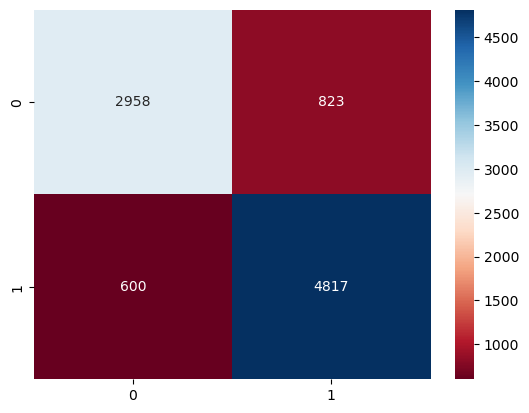

In [666]:
sns.heatmap(confusion_matrix(y_test_best, y_pred), annot=True, fmt='d', cmap='RdBu')
plt.show()

#### Анализ метрик
**Модель №1**

Можем предположить, что наша модель используется в мед целях. В таком случае заметим, что ошибка второго рода превалирует над ошибкой первого рода. И само значение достаточно большое.

Значение auc в нашем случае просто хорошее. 

В целом метрики отличные для "хорошей модели".

## Model №2

In [643]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [645]:
y_pred = model2.predict(X_test)

In [647]:
acc = accuracy_score(y_test, y_pred)
ppv = precision_score(y_test, y_pred)
Re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"=== Метрики ===\nМеткость - {round(acc, 3)}\nТочность - {round(ppv, 3)}\nПолнота - {round(Re, 3)}\nF1-мера - {round(f1, 3)}\nКривая - {round(auc, 3)}")

=== Метрики ===
Меткость - 0.845
Точность - 0.854
Полнота - 0.889
F1-мера - 0.871
Кривая - 0.836


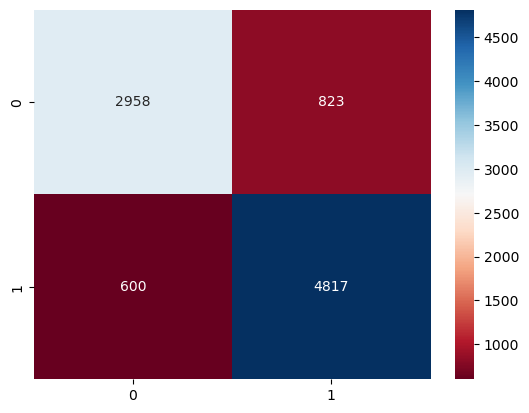

In [664]:
sns.heatmap(confusion_matrix(y_test_best, y_pred), annot=True, fmt='d', cmap='RdBu')
plt.show()